In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
def get_parsed_data():
    fname = "vsdata1.txt"
    df = pd.read_table(fname, sep=" ", skiprows=1, header=None)
    return df

In [4]:
data = get_parsed_data()
data = data.drop([50], axis=1)
data.columns = [str(s) for s in range(1, data.columns[-1]+1)] + ["stimulus"]

Explained variance: 
 0.07511240429511115


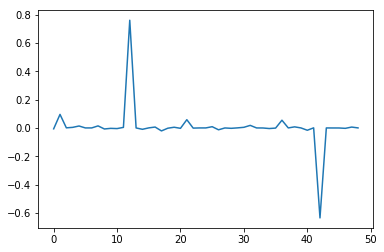

Explained variance: 
 0.07407453206252154


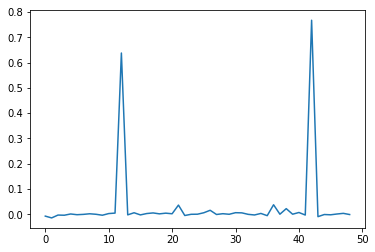

Explained variance: 
 0.06678016502357129


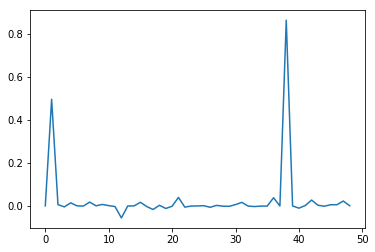

Explained variance: 
 0.06265168907831377


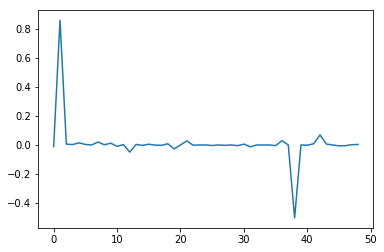

Explained variance: 
 0.04588804655827805


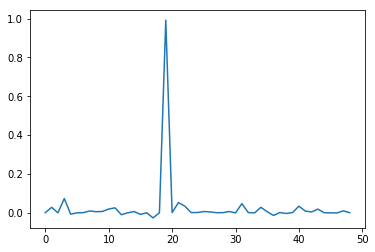

Explained variance: 
 0.04126146860082764


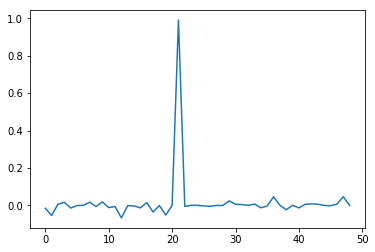

Explained variance: 
 0.03587864845447754


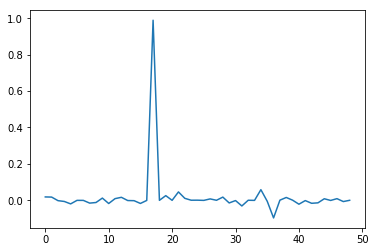

Explained variance: 
 0.034180916583703015


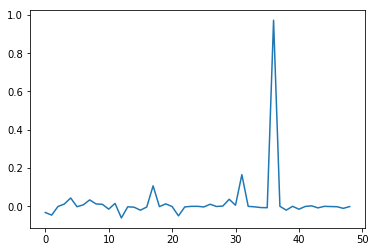

Explained variance: 
 0.030097005427503425


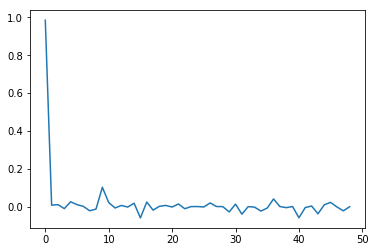

Explained variance: 
 0.02785981848584029


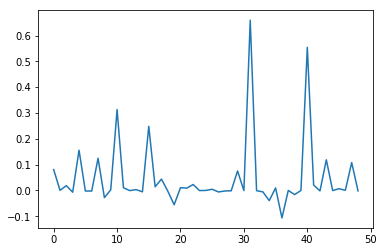

Explained variance: 
 0.027540947532018394


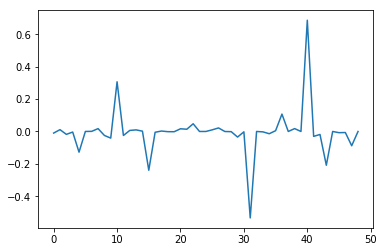

Explained variance: 
 0.027140786546655245


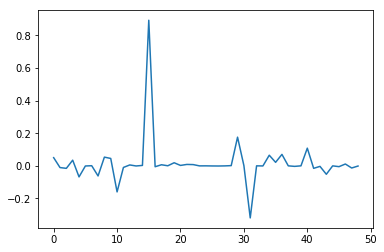

Explained variance: 
 0.02620139763575111


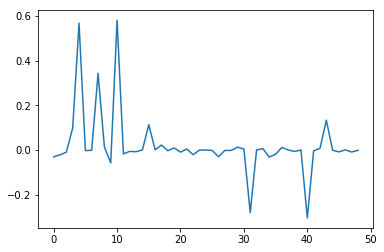

Explained variance: 
 0.02570732335615598


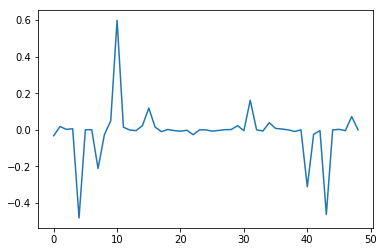

Explained variance: 
 0.02535285105770357


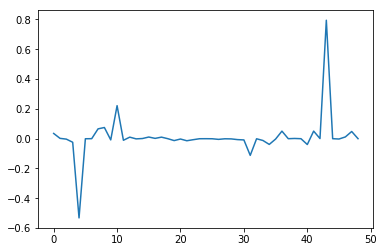

Explained variance: 
 0.024339925184772383


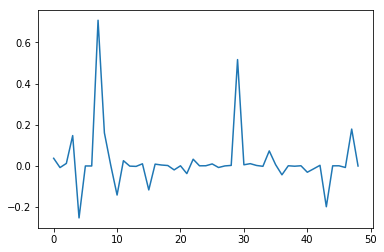

Explained variance: 
 0.023926870889305972


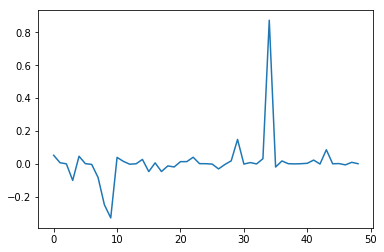

Explained variance: 
 0.023594542731123


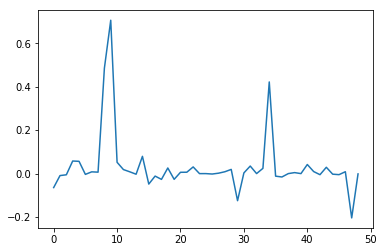

Explained variance: 
 0.023191100776901744


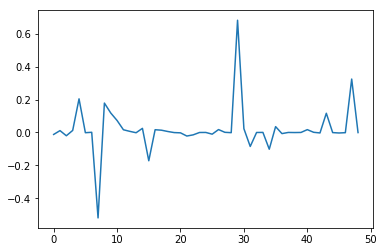

Explained variance: 
 0.02271144801552395


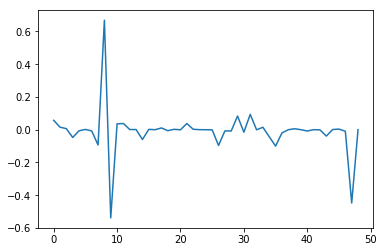

Explained variance: 
 0.022482687492677456


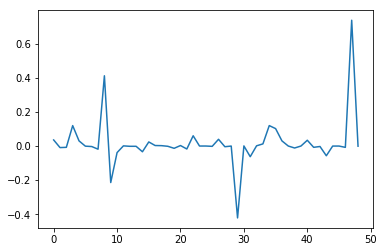

Explained variance: 
 0.021721440257202754


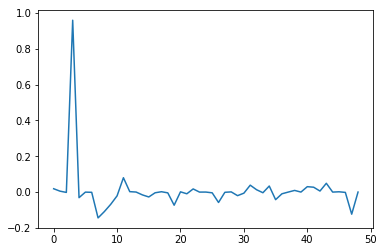

Explained variance: 
 0.020022221015944953


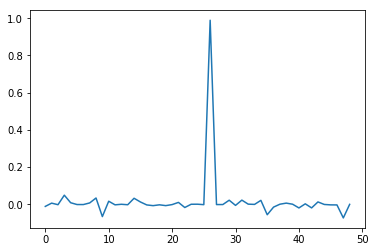

Explained variance: 
 0.017574265909822702


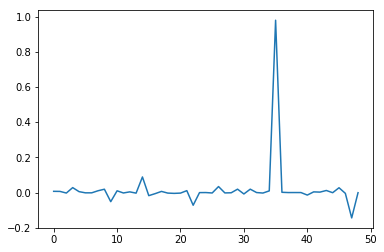

Explained variance: 
 0.01632887786078878


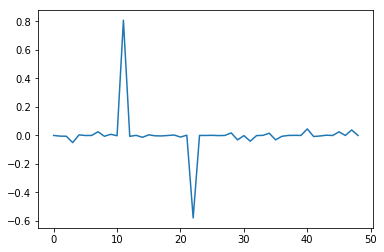

Explained variance: 
 0.016151491812863426


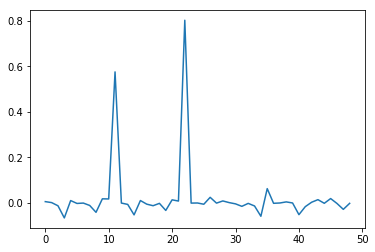

Explained variance: 
 0.015145367334328641


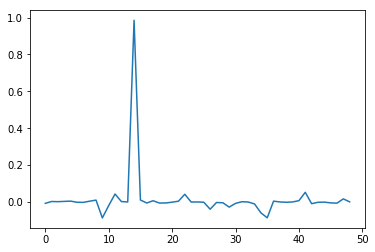

Explained variance: 
 0.01199474154808045


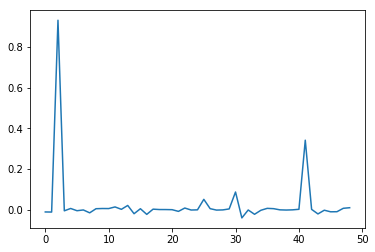

Explained variance: 
 0.010708692197532673


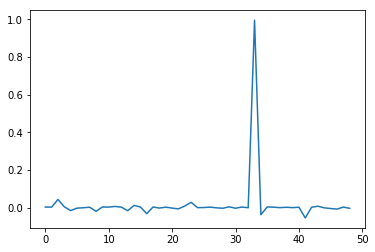

Explained variance: 
 0.01048822691415302


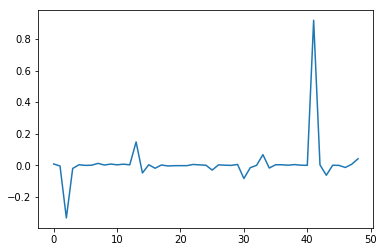

Explained variance: 
 0.01015923231477208


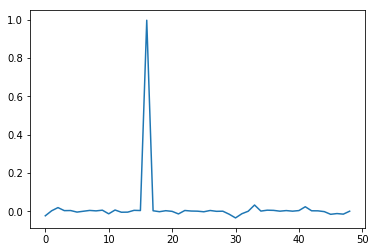

Explained variance: 
 0.00935334596230518


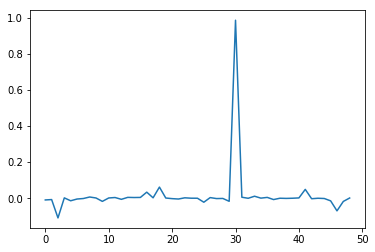

Explained variance: 
 0.009104821282505903


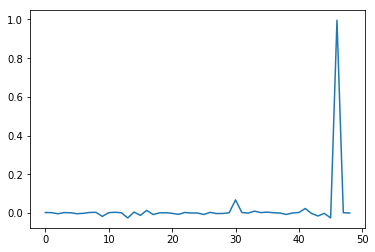

Explained variance: 
 0.008813097093857334


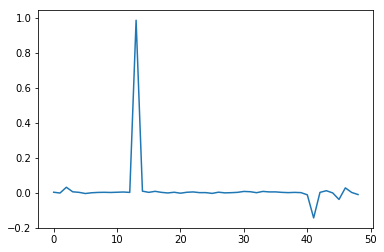

Explained variance: 
 0.008553380202800642


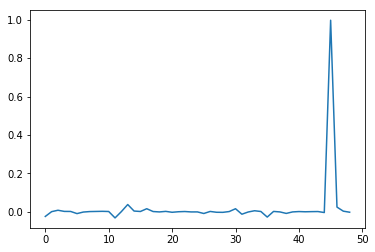

Explained variance: 
 0.007508289813345037


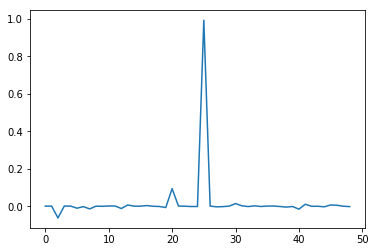

Explained variance: 
 0.006707535740019898


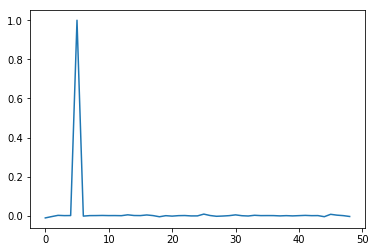

Explained variance: 
 0.0053323538173822415


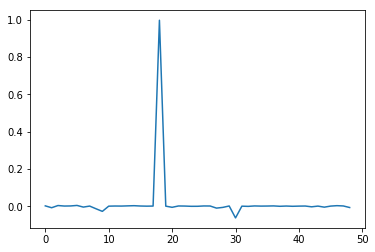

Explained variance: 
 0.004788748522391438


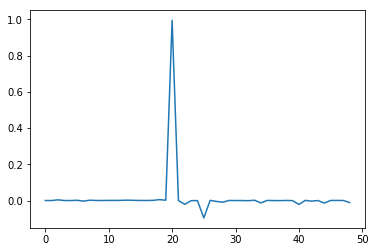

Explained variance: 
 0.004604564536675552


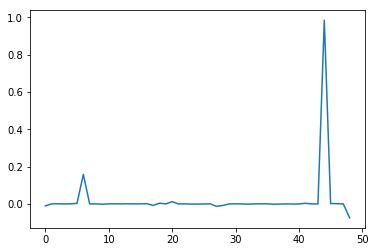

Explained variance: 
 0.004553048729641246


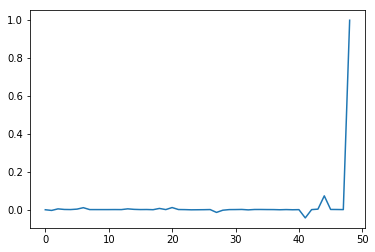

Explained variance: 
 0.0042927955324852584


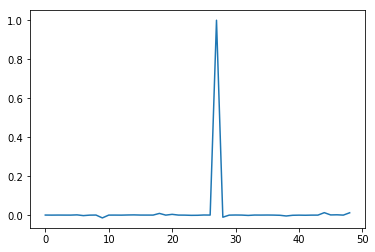

Explained variance: 
 0.0037299449233443266


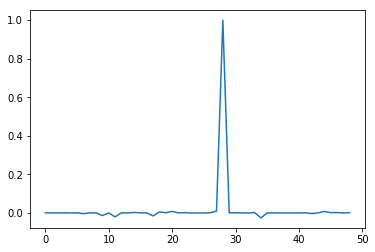

Explained variance: 
 0.0029067263735810802


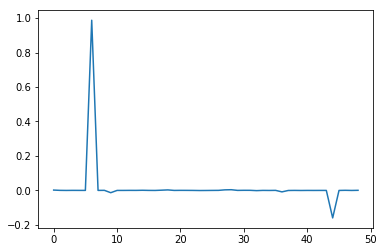

Explained variance: 
 0.002146074512028382


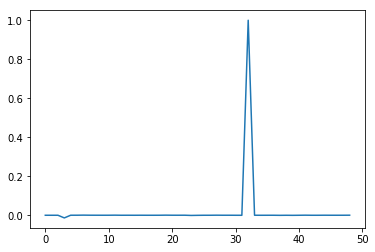

Explained variance: 
 0.001336140003410601


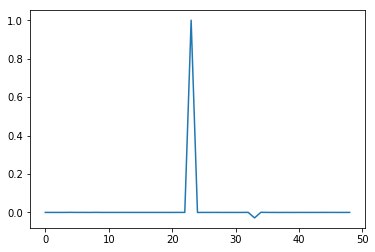

Explained variance: 
 5.431753724166968e-34


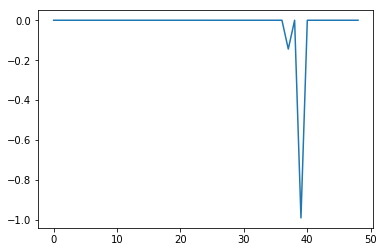

Explained variance: 
 5.431753724166968e-34


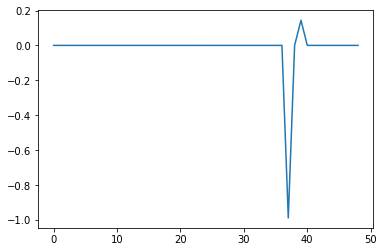

Explained variance: 
 5.431753724162111e-34


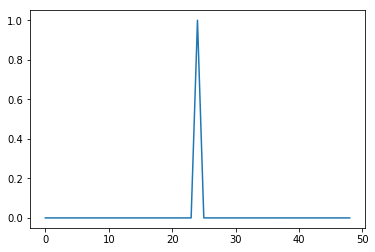

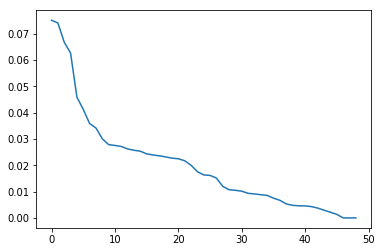

In [5]:
# PCA stuff
from sklearn.decomposition import PCA
valarray = data.drop(["stimulus"], axis=1).values
pca = PCA(n_components=valarray.shape[1])
transformed_array = pca.fit_transform(valarray)
for i in range(valarray.shape[1]):
    print("Explained variance: \n", pca.explained_variance_ratio_[i])
    plt.clf()
    plt.plot(pca.components_[i])
    plt.show()
plt.plot(pca.explained_variance_ratio_)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


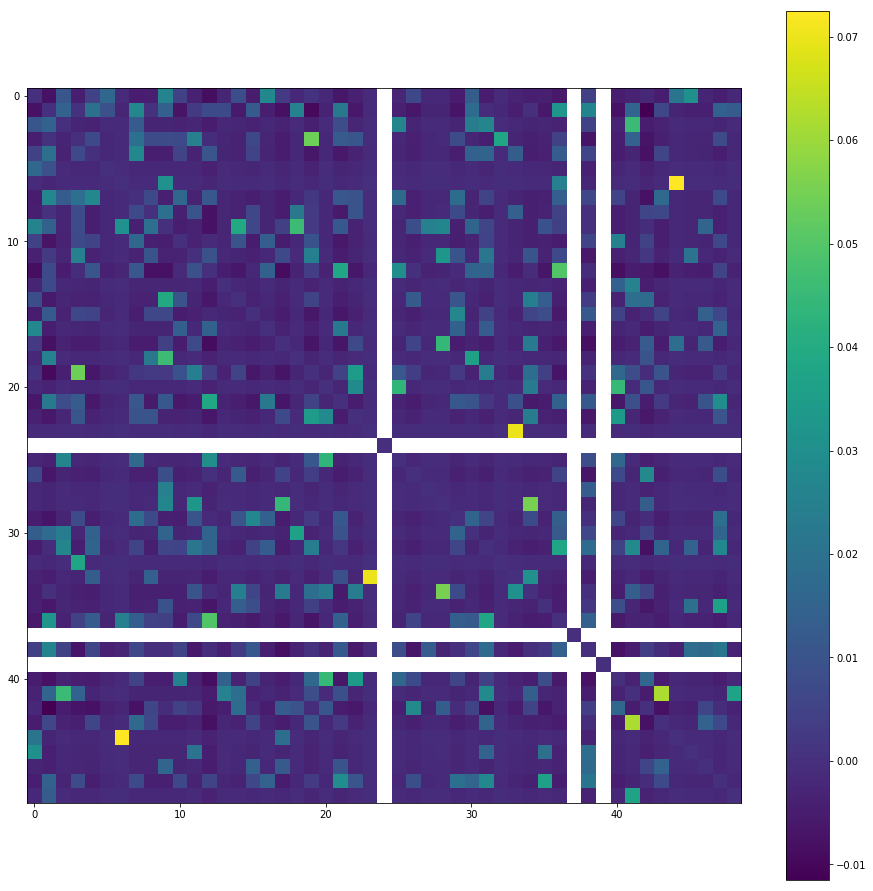

corr: 
 [ 0.         -0.00751974  0.01100176 -0.00450237  0.00481783  0.01647568
 -0.00164625 -0.00474404 -0.00461131  0.02589517  0.00476819 -0.00388133
 -0.00829895 -0.00285288  0.00881348 -0.0049991   0.02770223  0.0027904
 -0.00222027  0.00091084 -0.00210624 -0.00620096 -0.00388133 -0.00110974
         nan -0.00262756  0.00665347 -0.00198568 -0.00185735 -0.00466485
  0.01308832 -0.0050486  -0.00140382 -0.00314144 -0.00458553 -0.00403775
 -0.00563141         nan  0.00447136         nan -0.00502391 -0.00314144
 -0.00224038 -0.00484764  0.0209391   0.03071022 -0.00289585 -0.00458432
 -0.00204684]
pvals: 
 [0.00000000e+00 2.75860845e-01 1.10877844e-01 5.14130640e-01
 4.85094341e-01 1.69600741e-02 8.11454892e-01 4.91805956e-01
 5.04001671e-01 1.74750218e-04 4.89603557e-01 5.73824903e-01
 2.29138386e-01 6.79315621e-01 2.01551843e-01 4.68820162e-01
 5.94543878e-05 6.85959964e-01 7.47657774e-01 8.94995740e-01
 7.60210303e-01 3.68887267e-01 5.73824903e-01 8.72245389e-01
 1.00000000e+00 7.03

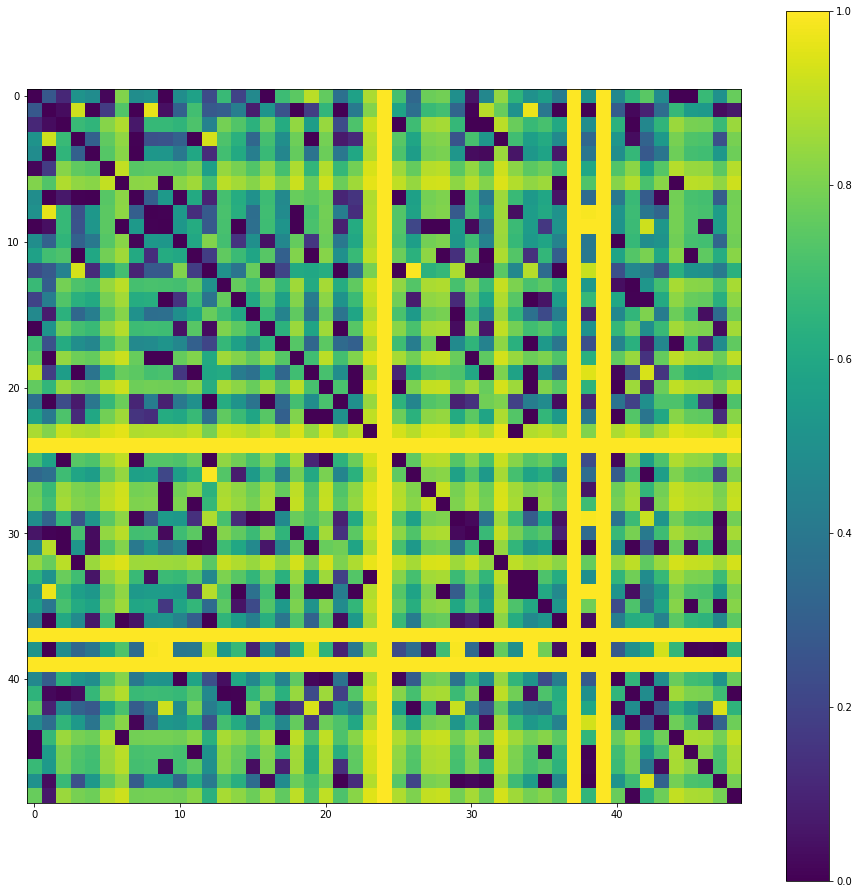

In [6]:
from scipy.stats import pearsonr
corr = np.zeros((len(data.values[0])-1, len(data.values[0])-1))
pval = np.zeros((len(data.values[0])-1, len(data.values[0])-1))
for i in range(len(data.values[0])-1):
    for j in range(len(data.values[0])-1):
        corr[i,j], pval[i,j] = pearsonr(data[str(i+1)], data[str(j+1)])
    corr[i, i] = 0

plt.figure(figsize=(16,16))
plt.imshow(corr)
plt.colorbar()
plt.show()

print("corr: \n", corr[0])
print("pvals: \n", pval[0])
plt.figure(figsize=(16,16))
plt.imshow(pval)
plt.colorbar()
plt.show()

In [7]:
# Collapse per stimulus stuff

stimuli = np.array(data["stimulus"])
new_stim_indices = np.where(stimuli[:-1] != stimuli[1:])[0]
new_stim_indices += np.ones_like(new_stim_indices)
new_stim_indices = np.concatenate([[0], new_stim_indices])
collected_signals = [data.values[np.arange(a, b),:] for (a, b) in zip(new_stim_indices[:-1], new_stim_indices[1:])]
summed_signals = [np.sum(np.array(collected_signals[i]), axis=0) / len(collected_signals[i]) for i in range(len(collected_signals))]
summed_signals = pd.DataFrame(summed_signals)

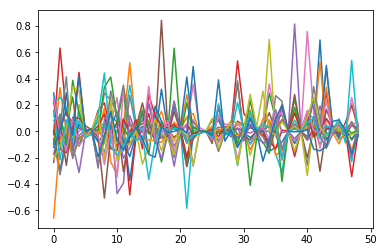

In [8]:
# PCA on summed data
from sklearn.decomposition import PCA
valarray = np.array(summed_signals.drop(len(summed_signals.columns)-1, axis=1).values)
pca = PCA(n_components=valarray.shape[1])
pca.fit(valarray)
lower_dimension_vectors = pca.components_[np.where(pca.explained_variance_ratio_ > 0.01)]
#transformed_data = np.zeros((lower_dimension_vectors.shape[0], len(valarray)))
ld_data = np.dot(lower_dimension_vectors, valarray.transpose()).transpose()
ld_data = pd.DataFrame(ld_data)
ld_data['stimulus'] = summed_signals[len(summed_signals.columns)-1]
[plt.plot(ld) for ld in lower_dimension_vectors]
plt.show()

In [9]:
#Normalization

ld_data_normalized = pd.DataFrame([(ld_data.iloc[:,i] - np.mean(ld_data.iloc[:,i])) / np.std(ld_data.iloc[:,i]) for i in range(ld_data.iloc[:,:-1].shape[1])]).transpose()
ld_data_normalized['stimulus'] = summed_signals[len(summed_signals.columns)-1]

hd_data_normalized = pd.DataFrame([(summed_signals.iloc[:,i] - np.mean(summed_signals.iloc[:,i])) / np.std(summed_signals.iloc[:,i]) for i in range(summed_signals.iloc[:,:-1].shape[1])]).transpose()
hd_data_normalized['stimulus'] = summed_signals[len(summed_signals.columns)-1]

In [10]:
# Evaluation fn
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, precision_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

def evaluate_classifier(clf, params, X, y, lastrun=False):
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    grid_clf = GridSearchCV(estimator=clf, param_grid=params, cv=inner_cv, iid=True)
    generalization_scores = cross_val_score(grid_clf, X=X, y=y, cv=outer_cv, scoring=make_scorer(precision_score, average="weighted"))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    test_results = grid_clf.fit(X_train, y_train).predict(X_test)

    print("Generalization scores prediction: ", generalization_scores.mean(), "+-", generalization_scores.std())
    print("Test results: ")
    print(classification_report(test_results, np.array(y_test)))
    print("predictions and true values:\n", list(zip(test_results, np.array(y_test))))
    print("Best params: ", grid_clf.best_params_)
    
    if lastrun:
        return
    
    print("\n***Shuffled data***\n")
    evaluate_classifier(clf, params, X, y.sample(frac=1), True)

In [11]:
# Decision trees
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = DecisionTreeClassifier(random_state=0)
params = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"]}
evaluate_classifier(clf, params, X, y)

Generalization scores prediction:  0.5072765820418674 +- 0.03682189118145947
Test results: 
              precision    recall  f1-score   support

         0.0       0.62      0.70      0.65        23
         1.0       0.17      0.33      0.22         3
         2.0       0.60      0.60      0.60         5
         3.0       0.50      0.17      0.25         6
         4.0       1.00      0.67      0.80         6
         5.0       0.60      0.75      0.67         4
         6.0       0.33      0.17      0.22         6
         7.0       0.40      0.67      0.50         3

   micro avg       0.55      0.55      0.55        56
   macro avg       0.53      0.51      0.49        56
weighted avg       0.58      0.55      0.54        56

predictions and true values:
 [(6.0, 6.0), (0.0, 0.0), (0.0, 0.0), (0.0, 7.0), (7.0, 0.0), (4.0, 4.0), (2.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (2.0, 2.0), (0.0, 5.0), (6.0, 3.0), (6.0, 0.0), (2.0, 0.0), (3.0, 5.0), (0.0, 0.0)

In [12]:
# SVM
from sklearn.svm import SVC
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = SVC(random_state=0)
#params = {"C": [0.001, 0.01, 0.1, 10, 100, 1000],
#          "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
#          "gamma": ['auto', 'scale', 0.01, 0.1, 1, 10, 100],
#         "coef0": [-1, 0, 1]}
params = {"C": [0.1, 10, 100],
         "kernel": ['poly', 'rbf'],
         "gamma": ['auto', 'scale', 0.1, 1, 10]}
evaluate_classifier(clf, params, X, y)

Generalization scores prediction:  0.5896825396825396 +- 0.03548160535359307
Test results: 
              precision    recall  f1-score   support

         0.0       0.96      0.60      0.74        42
         1.0       0.00      0.00      0.00         0
         2.0       0.20      0.50      0.29         2
         3.0       0.50      0.17      0.25         6
         4.0       0.25      1.00      0.40         1
         5.0       0.20      1.00      0.33         1
         6.0       0.33      1.00      0.50         1
         7.0       0.60      1.00      0.75         3

   micro avg       0.59      0.59      0.59        56
   macro avg       0.38      0.66      0.41        56
weighted avg       0.83      0.59      0.65        56

predictions and true values:
 [(6.0, 6.0), (0.0, 0.0), (0.0, 0.0), (7.0, 7.0), (0.0, 0.0), (4.0, 4.0), (0.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 2.0), (0.0, 5.0), (0.0, 3.0), (3.0, 0.0), (0.0, 0.0), (3.0, 5.0), (0.0, 0.0)

In [13]:
# Lasso regression
from sklearn.linear_model import Lasso

X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = Lasso(random_state=0)
clf.fit(X,y)
print("True R^2: ", clf.score(X, y))
clf.fit(X,y.sample(frac=1))
print("Shuffled: ", clf.score(X, y.sample(frac=1)))

True R^2:  0.07667632020281845
Shuffled:  0.0


In [14]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = GaussianNB()
params = {"var_smoothing": [1e-12, 1e-11, 1e-10, 1e-9, 1e-8]}
evaluate_classifier(clf, params, X, y)

Generalization scores prediction:  0.5890532255633575 +- 0.05187568900047896
Test results: 
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84        31
         1.0       0.00      0.00      0.00         0
         2.0       0.20      1.00      0.33         1
         3.0       0.50      0.10      0.17        10
         4.0       1.00      1.00      1.00         4
         5.0       0.40      1.00      0.57         2
         6.0       1.00      0.75      0.86         4
         7.0       0.80      1.00      0.89         4

   micro avg       0.70      0.70      0.70        56
   macro avg       0.60      0.70      0.58        56
weighted avg       0.82      0.70      0.72        56

predictions and true values:
 [(6.0, 6.0), (0.0, 0.0), (0.0, 0.0), (7.0, 7.0), (0.0, 0.0), (4.0, 4.0), (2.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (3.0, 2.0), (3.0, 2.0), (3.0, 5.0), (0.0, 3.0), (0.0, 0.0), (3.0, 0.0), (5.0, 5.0), (0.0, 0.0)

In [15]:
# K Neighbors
from sklearn.neighbors import KNeighborsClassifier
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = KNeighborsClassifier()
params = {"n_neighbors": [2, 3, 4, 5, 6, 7],
         "p": [1, 2, 3]}
evaluate_classifier(clf, params, X, y)

Generalization scores prediction:  0.5635392713977359 +- 0.0560654617973372
Test results: 
              precision    recall  f1-score   support

         0.0       1.00      0.58      0.73        45
         1.0       0.00      0.00      0.00         0
         2.0       0.20      0.50      0.29         2
         3.0       0.50      0.50      0.50         2
         4.0       0.50      1.00      0.67         2
         5.0       0.20      1.00      0.33         1
         6.0       0.67      0.67      0.67         3
         7.0       0.20      1.00      0.33         1

   micro avg       0.61      0.61      0.61        56
   macro avg       0.41      0.66      0.44        56
weighted avg       0.89      0.61      0.69        56

predictions and true values:
 [(6.0, 6.0), (0.0, 0.0), (0.0, 0.0), (0.0, 7.0), (0.0, 0.0), (4.0, 4.0), (0.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (2.0, 2.0), (0.0, 5.0), (0.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 5.0), (0.0, 0.0),

In [16]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = RandomForestClassifier(random_state=0)
params = {"n_estimators": [50],
         "criterion": ["gini", "entropy"]}
evaluate_classifier(clf, params, X, y)

Generalization scores prediction:  0.6516976783340935 +- 0.08287630968147071
Test results: 
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        43
         1.0       0.00      0.00      0.00         0
         2.0       0.20      0.50      0.29         2
         3.0       0.50      0.25      0.33         4
         4.0       0.75      1.00      0.86         3
         5.0       0.20      1.00      0.33         1
         6.0       0.67      1.00      0.80         2
         7.0       0.20      1.00      0.33         1

   micro avg       0.62      0.62      0.62        56
   macro avg       0.44      0.67      0.46        56
weighted avg       0.88      0.62      0.70        56

predictions and true values:
 [(6.0, 6.0), (0.0, 0.0), (0.0, 0.0), (0.0, 7.0), (0.0, 0.0), (4.0, 4.0), (0.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 2.0), (0.0, 5.0), (0.0, 3.0), (0.0, 0.0), (0.0, 0.0), (3.0, 5.0), (0.0, 0.0)

In [17]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = AdaBoostClassifier(random_state=0)
params = {"n_estimators": [10, 30, 50, 70]}
evaluate_classifier(clf, params, X, y)

Generalization scores prediction:  0.35989717451285774 +- 0.0750253506518491
Test results: 
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.56        31
         1.0       0.00      0.00      0.00         0
         2.0       0.20      0.17      0.18         6
         3.0       0.50      0.20      0.29         5
         4.0       0.00      0.00      0.00         0
         5.0       0.20      0.08      0.12        12
         6.0       0.00      0.00      0.00         0
         7.0       0.20      0.50      0.29         2

   micro avg       0.36      0.36      0.36        56
   macro avg       0.21      0.18      0.18        56
weighted avg       0.46      0.36      0.39        56

predictions and true values:
 [(2.0, 6.0), (0.0, 0.0), (5.0, 0.0), (0.0, 7.0), (0.0, 0.0), (3.0, 4.0), (0.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 2.0), (0.0, 5.0), (3.0, 3.0), (5.0, 0.0), (5.0, 0.0), (3.0, 5.0), (0.0, 0.0)